In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Load Data
df = pd.read_csv("fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [9]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [10]:
df1= df[(df.loc[:,'value'] <= df['value'].quantile(0.975)) & (df.loc[:,'value'] >= df['value'].quantile(0.025))]
df1

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [11]:
DATE_plot= df1.iloc[:,0]
DATE_plot
df1.index=df1['date']
df1.drop('date',inplace=True,axis=1)

/var/folders/6_/40gq5b1j3rd68b16888_vg340000gn/T/ipykernel_23643/3429623483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('date',inplace=True,axis=1)


In [12]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 
#The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. 
#The label on the x axis should be Date and the label on the y axis should be Page Views.

In [13]:
def draw_line_plot(date,data):
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(pd.to_datetime(date), data, color='red')
    ax.set_title('freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    

    

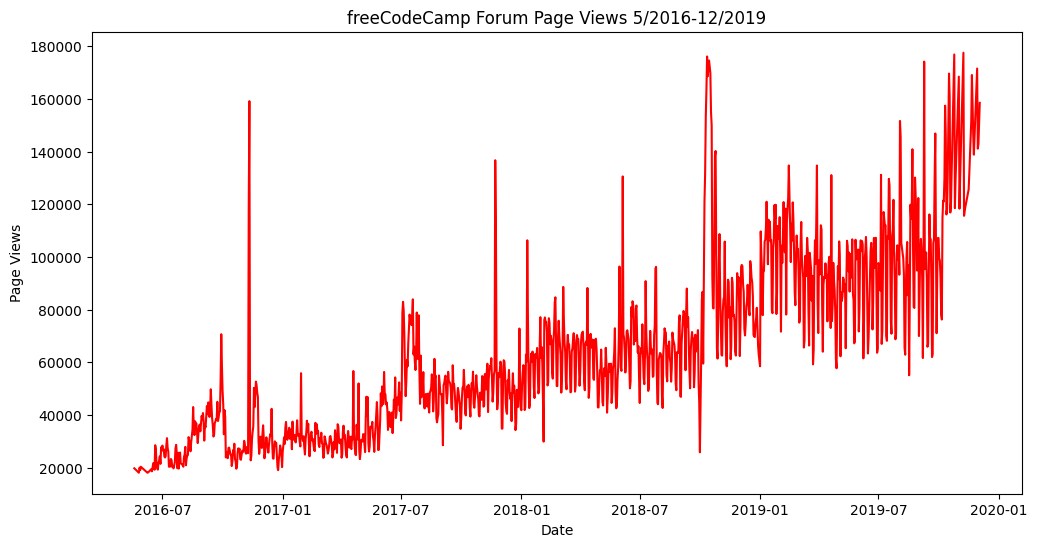

In [14]:
draw_line_plot(DATE_plot,df1.loc[:,'value'])

In [15]:
#Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
#It should show average daily page views for each month grouped by year. 
#The legend should show month labels and have a title of Months. 
#On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [16]:
df2= df1
df2

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [17]:
#Index must be datetime
df2.index=pd.to_datetime(df2.index)
#Goupby Months
df2 = df2.resample('M').mean()
df2

/var/folders/6_/40gq5b1j3rd68b16888_vg340000gn/T/ipykernel_23643/1387836781.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = df2.resample('M').mean()


,value
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667
2016-10-31,27398.322581
2016-11-30,40448.633333
2016-12-31,27832.419355
2017-01-31,32785.161290


In [18]:
df2['Years']=df2.index.year
df2['Months']=df2.index.month_name()
df2

,value,Years,Months
date,,,
2016-05-31,19432.400000,2016,May
2016-06-30,21875.105263,2016,June
2016-07-31,24109.678571,2016,July
2016-08-31,31049.193548,2016,August
2016-09-30,41476.866667,2016,September
2016-10-31,27398.322581,2016,October
2016-11-30,40448.633333,2016,November
2016-12-31,27832.419355,2016,December
2017-01-31,32785.161290,2017,January


In [19]:
def draw_bar_plot(data):
    plt.figure(figsize=(12,6))
    sns.catplot(
    x=data.iloc[:,1],
    y=data.iloc[:,0],
    hue=data.iloc[:,2],
    data=data,
    kind='bar'
    ).fig
    plt.legend
    plt.xlabel('Month')
    plt.ylabel('Average Daily Page Views')
    plt.title('Average Daily Page Views per Month by Year')

<Figure size 1200x600 with 0 Axes>

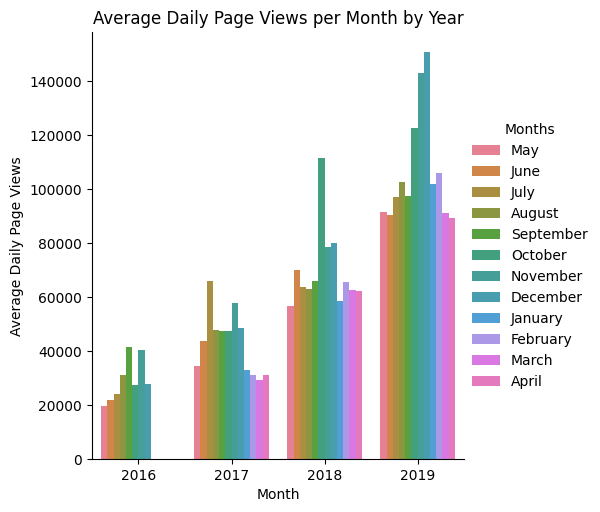

In [20]:
draw_bar_plot(df2)

In [21]:
#Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png".
#These box plots should show how the values are distributed within a given year or month and how it compares over time. 
#The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second 
#chart should be Month-wise Box Plot (Seasonality). 
#Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 
#The boilerplate includes commands to prepare the data.

In [42]:
def draw_bar_plot(data):

    plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(24,7))
    fig,(ax1,ax2) = plot_objects

    ax1.set_title('Year-wise Box Plot (Trend)')
    sns.boxplot(
    x=data.iloc[:,1],
    y=data.iloc[:,0],
    hue=data.iloc[:,1],
    data=data,
    showfliers=True,
    ax=ax1
    )


    month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
    ]

    ax2.set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(
    x=data.iloc[:,2],
    order=month_order,
    y=data.iloc[:,0],
    hue=data.iloc[:,2],
    data=data,
    showfliers=True,
    ax=ax2
    )   

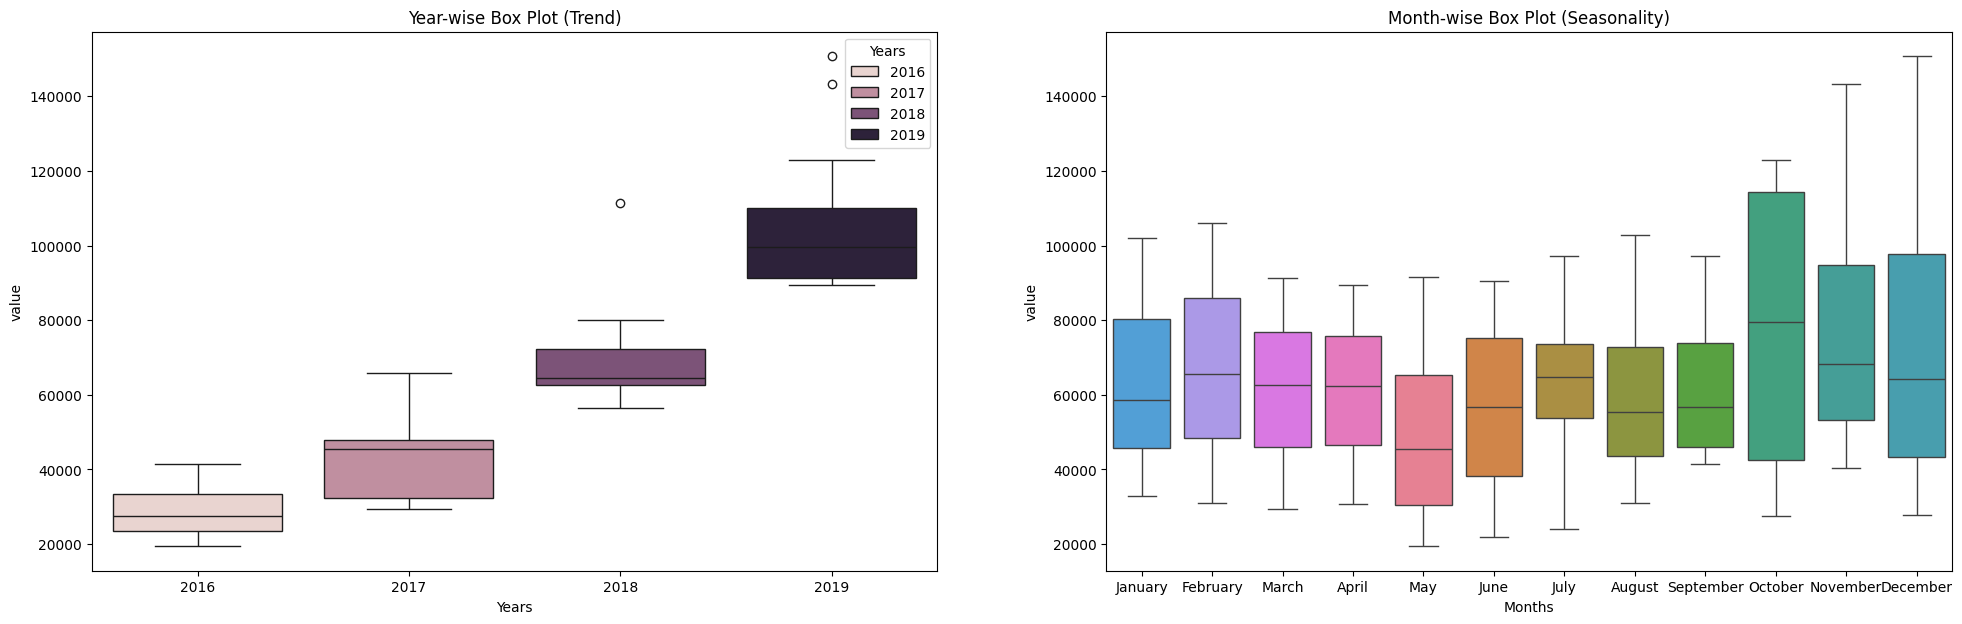

In [44]:
draw_bar_plot(df2)